# Data exploration

Using the Banking Dataset - Marketing Targets (https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets), we want to predict to predict if customers will convert or not to a Protuguese Bank.


In [ ]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sklearn as skl
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Example: list contents of a folder
folder_path = '/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/data'
print(os.listdir(folder_path))

['train.csv', 'test.csv']


In [ ]:
# Load csv files
file_1 = Path("/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/data/train.csv")
file_2 = Path("/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/data/test.csv")

#Read and display
data_df_1 = pd.read_csv(file_1, sep=";")
data_df_2 = pd.read_csv(file_2, sep=";")

In [ ]:
data_df_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data_df_2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
#Combine two datasets
combined_df = pd.concat([data_df_1, data_df_2], axis=0)
combined_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Descriptive Statistics

In [ ]:
combined_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
import plotly.express as px

In [ ]:
# Histogram of age
fig = px.histogram(combined_df, x="age", nbins=20, color="marital")
fig.show()

plt.savefig('/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/age_plot.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [ ]:
# Bar chart - marital status
marital_counts = combined_df['marital'].value_counts().reset_index()
marital_counts.columns = ['marital', 'count']

# Create the bar plot
marital_status_plot = px.bar(marital_counts, x='count', y='marital')
marital_status_plot.show()

plt.savefig('/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/marital_status_plot.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [ ]:
# Bar chart - education
education_counts = combined_df['education'].value_counts().reset_index()
education_counts.columns = ['education', 'count']

# Create the bar plot
education_plot = px.bar(education_counts, x='count', y='education')
education_plot.show()

plt.savefig('/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/education_plot.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [ ]:
# Bar chart - job
job_counts = combined_df['job'].value_counts().reset_index()
job_counts.columns = ['job', 'count']

# Create the bar plot
job_plot = px.bar(job_counts, x='count', y='job')
job_plot.show()

plt.savefig('/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/job_plot.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [ ]:
# Bar chart - loan
loan_counts = combined_df['loan'].value_counts().reset_index()
loan_counts.columns = ['loan', 'count']

# Create the bar plot
loan_plot = px.bar(loan_counts, x='count', y='loan')
loan_plot.show()

plt.savefig('/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/loan_plot.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [ ]:
# Bar chart - housing
housing_counts = combined_df['housing'].value_counts().reset_index()
housing_counts.columns = ['housing', 'count']

# Create the bar plot
housing_plot = px.bar(housing_counts, x='count', y='housing')
housing_plot.show()

plt.savefig('/content/drive/My Drive/Boot_Camp_TEC-2024/23-Project-4-Week-1/Notebooks/housing_plot.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

#Preparing data

In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [ ]:
# Select categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Check the number of unique values in each column
combined_df[categorical_cols].nunique()

,0
job,12
marital,3
education,4
default,2
housing,2
loan,2
contact,3
month,12
poutcome,4
y,2


In [ ]:
#Convert to dummies categorical columns
df_encoded = pd.get_dummies(combined_df, columns=categorical_cols, dtype=int)

In [ ]:
df_encoded.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y_no', 'y_yes'],
      dtype='object')

In [ ]:
# Deleting innecesary columns for the neural network
final_df_reduced = df_encoded.drop(columns=['y_no', 'job_unknown', 'marital_divorced', 'education_unknown','default_no', 'housing_no', 'loan_no', 'contact_unknown', 'poutcome_unknown'])

In [ ]:
final_df_reduced.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success', 'y_yes'],
      dtype='object')

In [ ]:
# Print lenght of data frame for the input_dim of the neural network model
len(final_df_reduced.columns)

44

In [ ]:
# Final check to the data frame
final_df_reduced.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Split our preprocessed data into our features and target arrays
y = final_df_reduced['y_yes'].values
X = final_df_reduced.drop('y_yes', axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 38)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Neural Network

First Model

In [ ]:
# Define the model.
model_1 = tf.keras.models.Sequential()

# First hidden layer
model_1.add(tf.keras.layers.Dense(units=43, activation="relu", input_dim=43))

# Second hidden layer
model_1.add(tf.keras.layers.Dense(units=22, activation="relu"))

# Output layer
model_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 43)                  │           1,892 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 22)                  │             968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              23 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,883 (11.26 KB)

 Trainable params: 2,883 (11.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Use of early stop because there was overfitting
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [ ]:
# Train the model
fit_model = model_1.fit(X_train_scaled, y_train, epochs=150, validation_split=0.2, callbacks=[early_stop])

Epoch 1/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8221 - loss: 0.3786 - val_accuracy: 0.8980 - val_loss: 0.2213
Epoch 2/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9060 - loss: 0.2140 - val_accuracy: 0.8988 - val_loss: 0.2111
Epoch 3/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9045 - loss: 0.2117 - val_accuracy: 0.9034 - val_loss: 0.2051
Epoch 4/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9115 - loss: 0.2061 - val_accuracy: 0.9036 - val_loss: 0.2041
Epoch 5/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9130 - loss: 0.1987 - val_accuracy: 0.9025 - val_loss: 0.2046
Epoch 6/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9135 - loss: 0.1936 - val_accuracy: 0.9020 - val_loss: 0.2041
Epoch 7/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9149 - loss: 0.1909 - val_accuracy: 0.9038 - val_loss: 0.2040
Epoch 8/150
933/933 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9176 - loss: 0.1834 - val_acc

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = model_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

389/389 - 1s - 3ms/step - accuracy: 0.9061 - loss: 0.2072
Loss: 0.20717765390872955, Accuracy: 0.9060564637184143


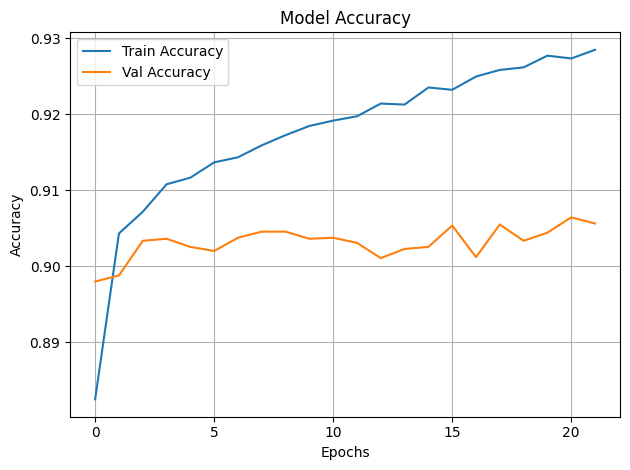

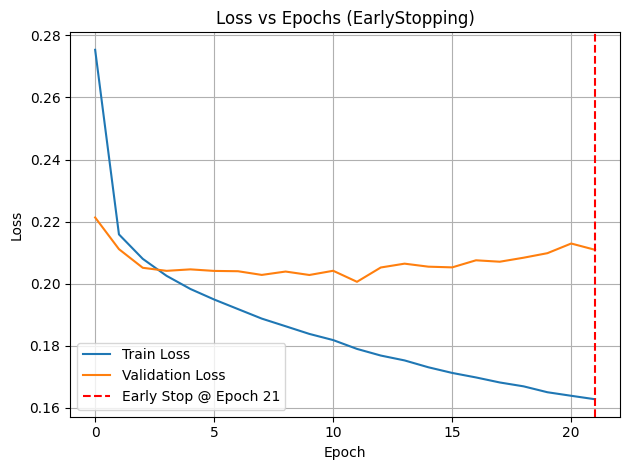

In [ ]:
#Plot accuracy and loss
# Accuracy
plt.plot(fit_model.history['accuracy'], label='Train Accuracy')
plt.plot(fit_model.history.get('val_accuracy'), label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Model Accuracy')
plt.tight_layout()
plt.show()

# Loss
# History of training
history = fit_model.history

# Epoch in chich the training stopped
stopped_epoch = len(history['loss']) - 1


plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')

plt.axvline(stopped_epoch, color='r', linestyle='--', label=f'Early Stop @ Epoch {stopped_epoch}')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs (EarlyStopping)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Save model
model_1.save("modelo_marketing_v1.h5")
